In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import graphviz

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)

In [5]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


<Axes: xlabel='NrSiblings'>

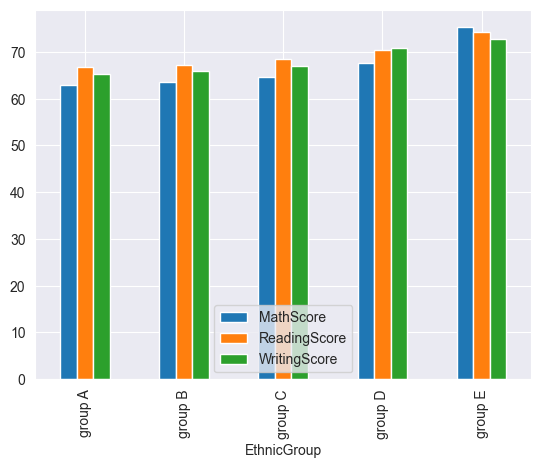

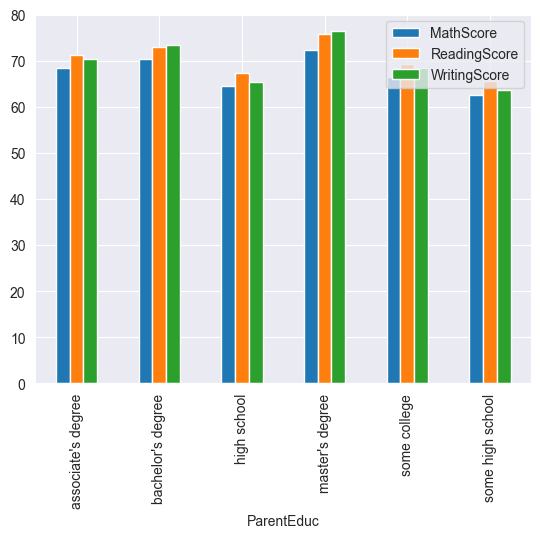

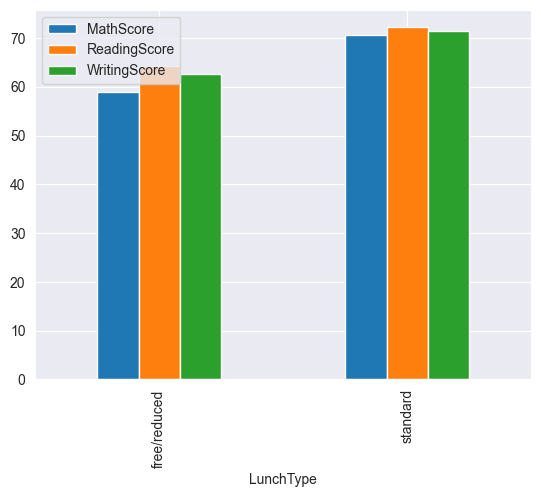

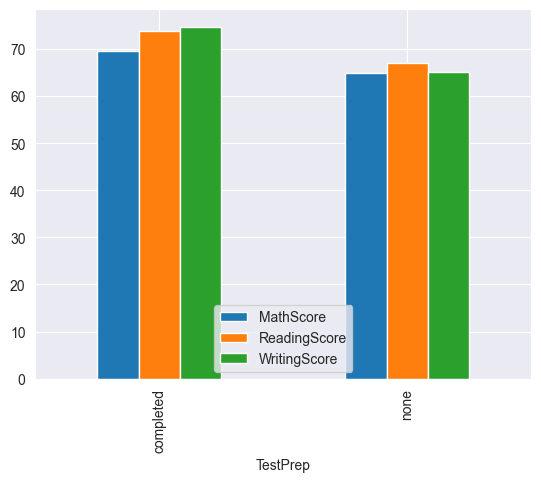

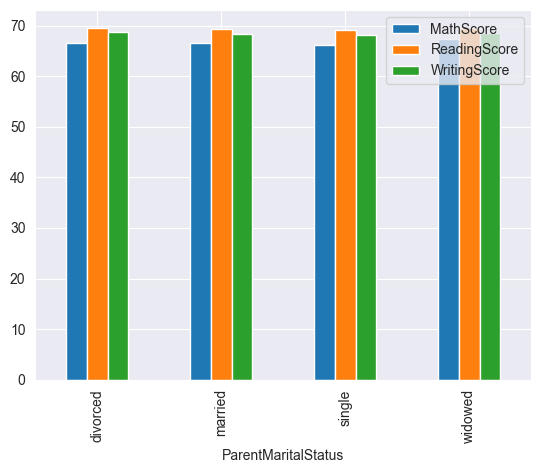

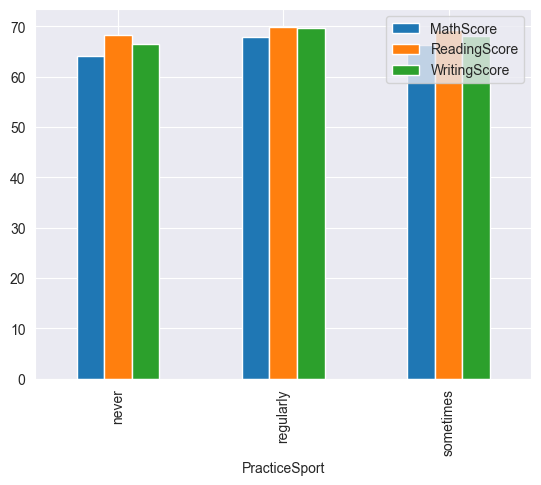

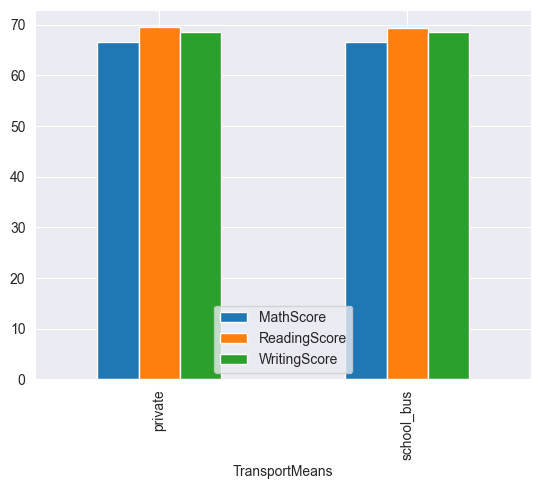

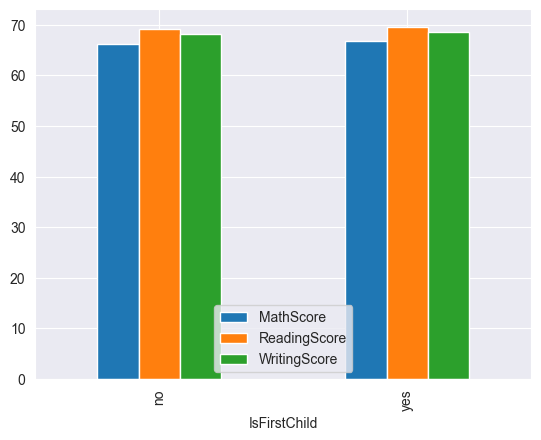

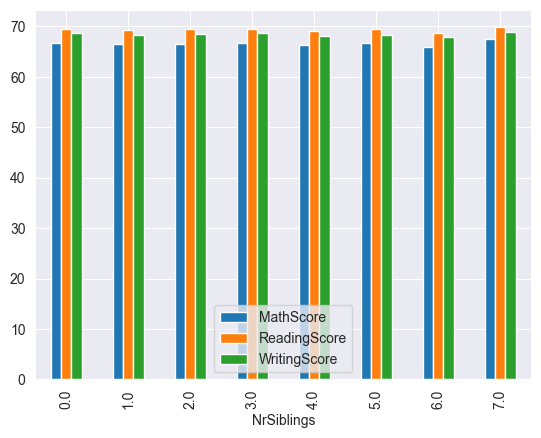

In [7]:
group_by_EthnicGroup = df.groupby('EthnicGroup').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_EthnicGroup.plot(kind='bar')
group_by_ParentEduc = df.groupby('ParentEduc').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_ParentEduc.plot(kind='bar')
group_by_Lunch = df.groupby('LunchType').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_Lunch.plot(kind='bar')
group_by_TestPrep = df.groupby('TestPrep').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_TestPrep.plot(kind='bar')
group_by_ParentMaritalStatus = df.groupby('ParentMaritalStatus').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_ParentMaritalStatus.plot(kind='bar')
group_by_PracticeSport = df.groupby('PracticeSport').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_PracticeSport.plot(kind='bar')
group_by_TransportMeans = df.groupby('TransportMeans').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_TransportMeans.plot(kind='bar')
group_by_IsFirstChild = df.groupby('IsFirstChild').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_IsFirstChild.plot(kind='bar')
group_by_NrOfSiblings = df.groupby('NrSiblings').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_NrOfSiblings.plot(kind='bar')

In [8]:
# group_by_NrOfSiblings
# group_by_IsFirstChild

In [19]:
processed_df = df.copy()
processed_df = processed_df.dropna()
processed_df.ParentEduc = processed_df.apply(lambda row: 1 if row.ParentEduc == 'some high school' else 2 if row.ParentEduc == 'high school' else 3 if row.ParentEduc == 'some college' else 4 if row.ParentEduc == 'associate\'s degree' else 5 if row.ParentEduc == 'bachelor\'s degree' else 6, axis=1)
processed_df.LunchType = processed_df.apply(lambda row: 1 if row.LunchType == 'free/reduced' else 2, axis=1)
processed_df.TestPrep = processed_df.apply(lambda row: 1 if row.TestPrep == 'none' else 2, axis=1)
# processed_df.ParentMaritalStatus = processed_df.apply(lambda row: 1 if row.ParentMaritalStatus == 'single' else 2 if row.ParentMaritalStatus == '', axis=1)
processed_df.EthnicGroup = processed_df.apply(lambda row: 1 if row.EthnicGroup == 'group A' else 2 if row.EthnicGroup == 'group B' else 3 if row.EthnicGroup == 'group C' else 4 if row.EthnicGroup == 'group D' else 5 if row.EthnicGroup == 'group E' else 6, axis=1)

processed_df.WklyStudyHours = processed_df.apply(lambda row: 1 if row.WklyStudyHours == '< 5' else 2 if row.WklyStudyHours == '5 - 10' else 3, axis=1)

processed_df.PracticeSport = processed_df.apply(lambda row: 1 if row.PracticeSport == 'never' else 2 if row.PracticeSport == 'sometimes' else 3, axis=1)

processed_df.IsFirstChild = processed_df.apply(lambda row: 1 if row.IsFirstChild == 'no' else 2, axis=1)

processed_df = processed_df.drop(['ParentMaritalStatus', 'TransportMeans', 'Gender'], axis=1)

processed_df.NrSiblings = processed_df.loc[:, 'NrSiblings'].astype('int64')

processed_df['SumScore'] = processed_df.apply(lambda row: row.MathScore + row.ReadingScore + row.WritingScore, axis=1)

processed_df

,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,SumScore
2,2,6,2,1,2,2,4,1,87,93,91,271
4,3,3,2,1,2,2,0,2,76,78,75,229
5,2,4,2,1,3,2,1,2,73,84,79,236
6,2,3,2,2,1,1,1,2,85,93,89,267
7,2,3,1,1,2,2,1,3,41,43,39,123
...,...,...,...,...,...,...,...,...,...,...,...,...
794,3,3,2,1,3,1,2,2,58,53,49,160
816,4,2,2,1,2,1,2,2,59,61,65,185
890,5,2,2,1,3,1,1,2,58,53,51,162
934,4,4,2,2,3,1,3,2,82,90,93,265


In [23]:
X = processed_df.loc[:, 'EthnicGroup':'WklyStudyHours']
Y = processed_df['SumScore']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=12)

tree = DecisionTreeClassifier(max_depth=5, 
                              random_state=21, 
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out


tree_pred = tree.predict(X_holdout)

accur = accuracy_score(y_holdout, tree_pred)


difference = np.abs(y_holdout - tree_pred)
within_range = np.where((difference >= -10) & (difference <= 10), True, False)
accuracy_within_range = np.mean(within_range)

print(f'Accuracy within range ±10: {accuracy_within_range * 100:.3f}%')
print(f'Accuracy: {accur * 100:.3f}%')

# 43,female,group E,bachelor's degree,standard,completed,married,sometimes,yes,0,private,5 - 10,100,100,100 (991)
# 586,female,group E,bachelor's degree,standard,completed,married,sometimes,yes,0,private,5 - 10,63,69,74 (1506)

Accuracy within range ±10: 19.245%
Accuracy: 1.005%


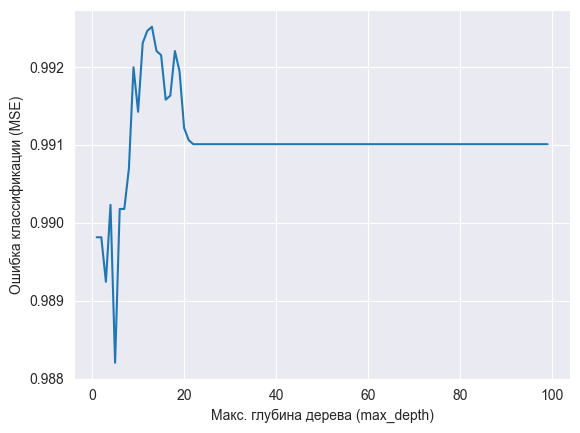

Optimal value of max_depth:  [5]


In [11]:
# Значения параметра max_depth
d_list = list(range(1,100))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)')
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Optimal value of max_depth: ', all_d_min)

In [12]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,10), 'max_features': range(1,10) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X, Y)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


Лучшее сочетание параметров:  {'max_depth': 3, 'max_features': 7}
Лучшие баллы cross validation:  0.012056322056322056


In [15]:
from sklearn.tree import export_graphviz
# Генерируем графическое представление дерева
Y_copy = Y.copy().astype('str')
graphviz_data = tree.export_graphviz(tree_grid.best_estimator_, 
                     feature_names=X.columns,
                     class_names=Y_copy.unique(),
                     out_file='./graphviz/gv.dot',  
                     filled=True, rounded=True);

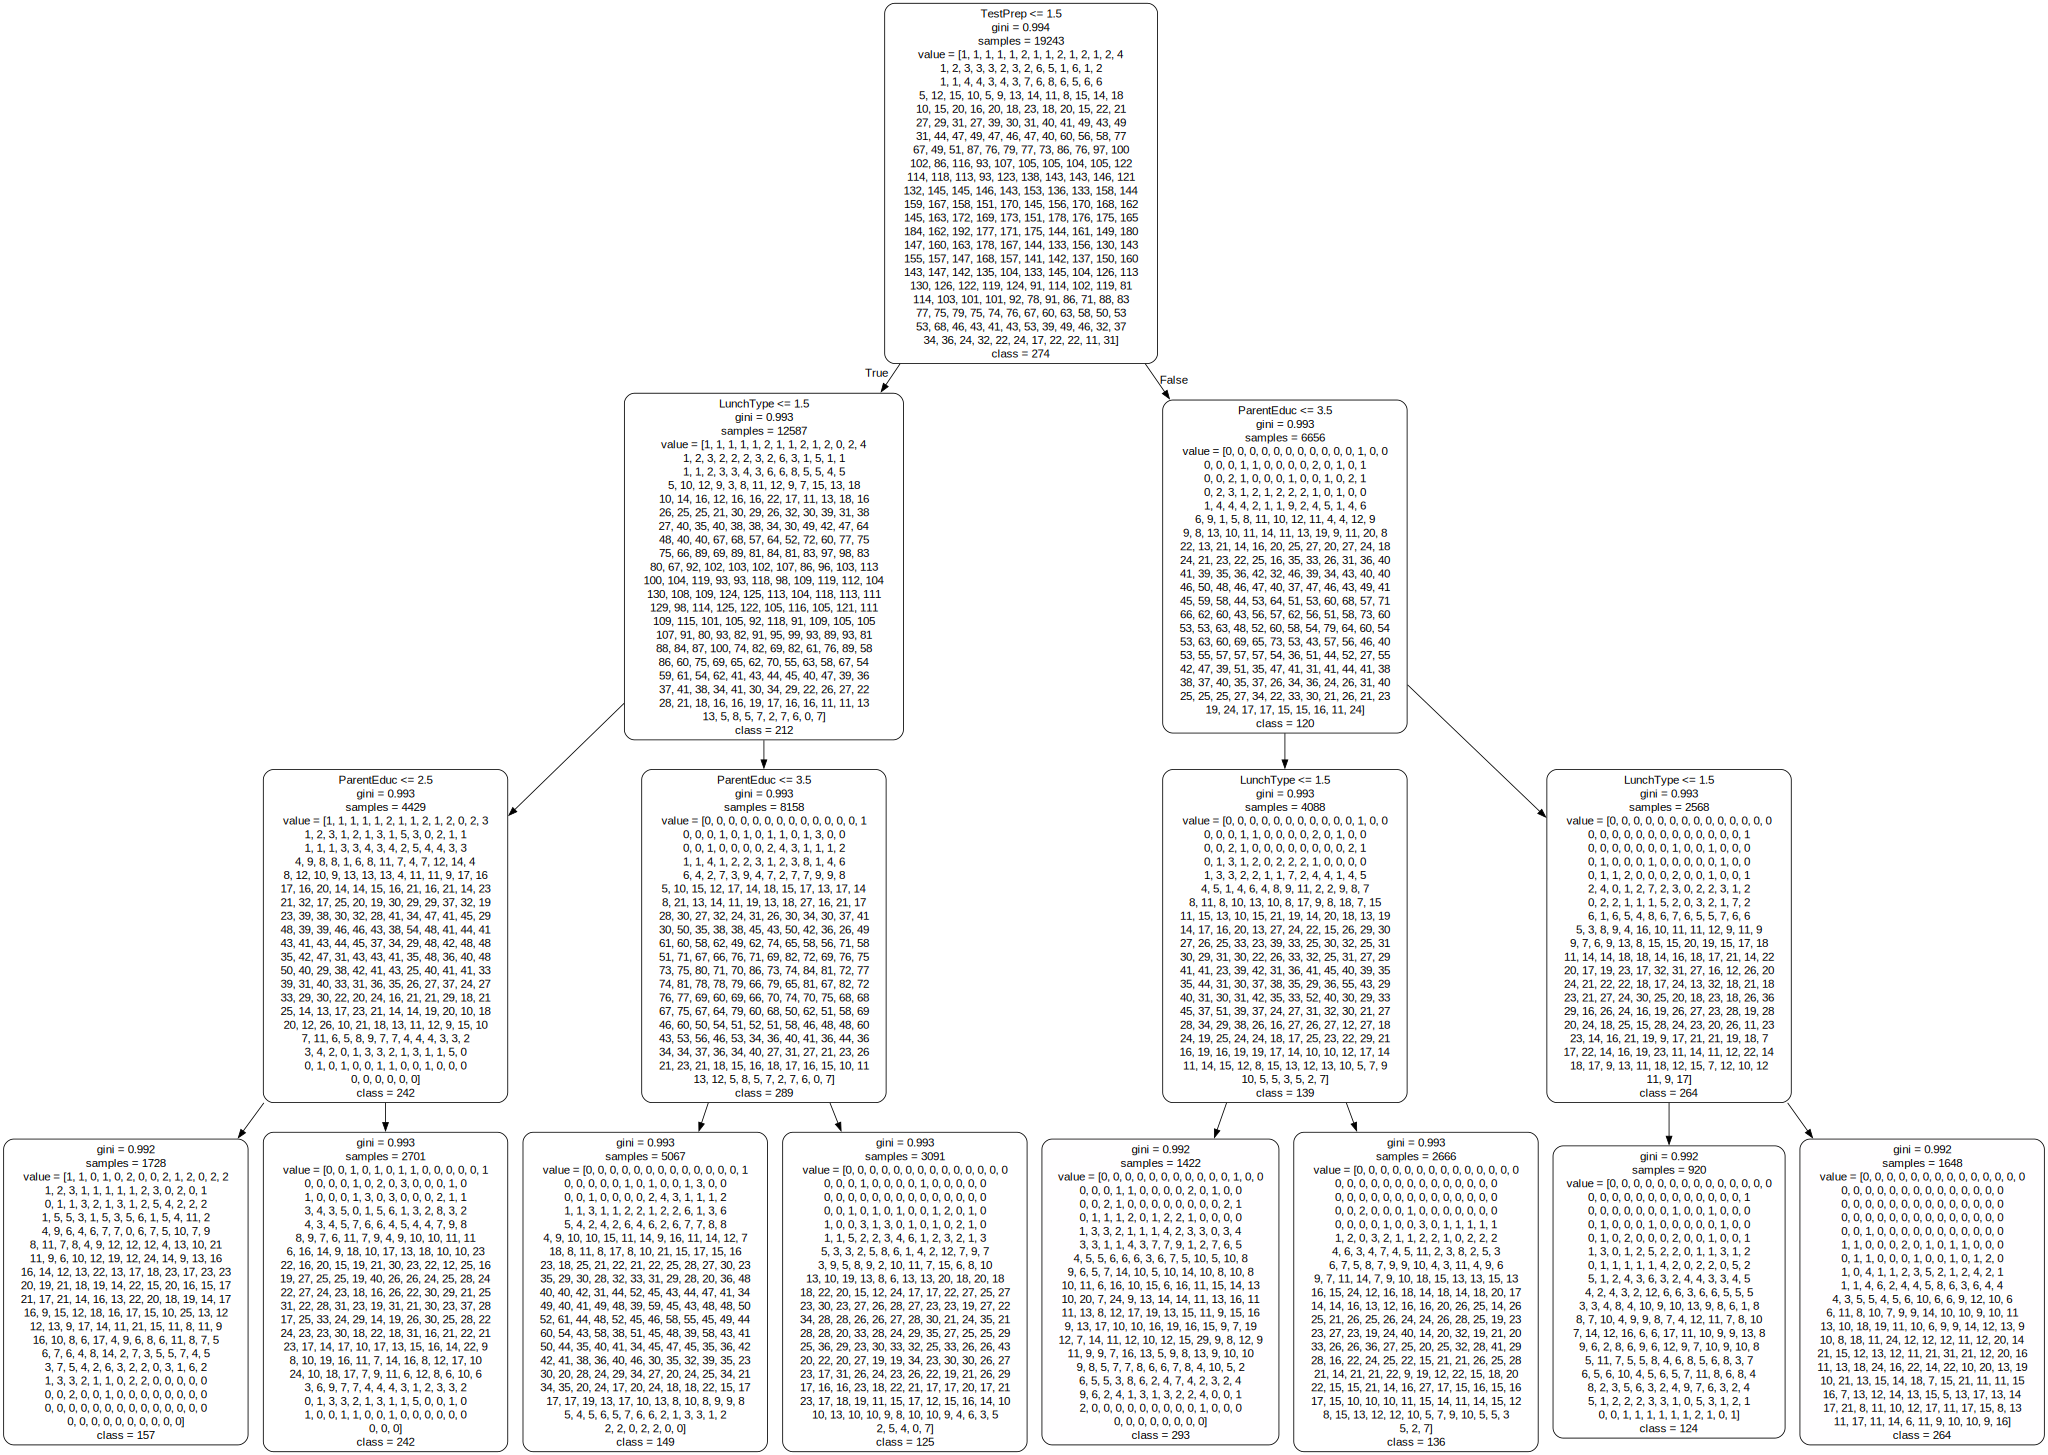

In [18]:
with open('./graphviz/gv.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

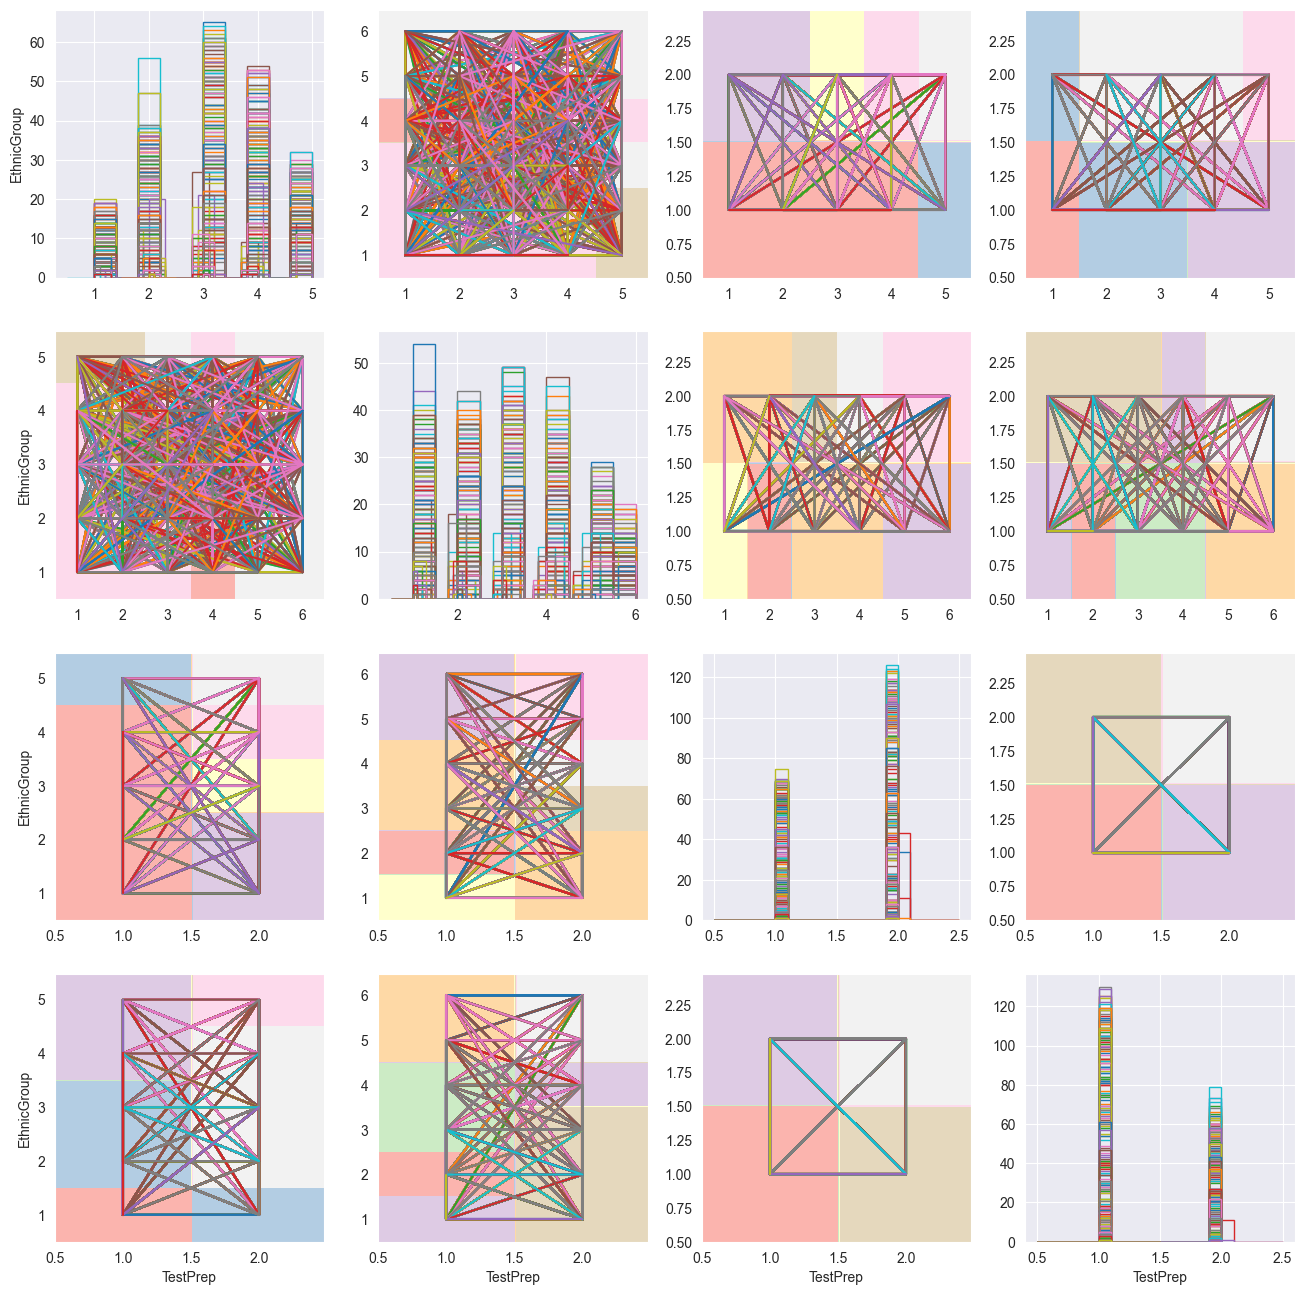

In [17]:
# plot_markers = ['r*', 'g^', 'bo']
answers = Y.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = X.min()-0.5
fmax = X.max()+0.5
plot_step = 0.02  

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
            model.fit(X.iloc[:, [i,j]].values, Y)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            xx = xx.astype(np.float32)
            yy = yy.astype(np.float32)
            p = p.astype(np.float32)
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(Y == answers[id_answer])
            if i==j:
                places[i, j].hist(X.iloc[idx].iloc[:,i],
                                  # color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(X.iloc[idx].iloc[:,i], X.iloc[idx].iloc[:,j], 
                                  # plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(X.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(X.columns[i])